Some typical NumPy 'random' functions:

In [ ]:
import numpy as np

# To generate a random float values between 0 and 1 (exclusive)
print(np.random.rand(3, 2)) # Creates a 3 x 2 matrix of random float values between 0 and 1 (exclusive)

# To generate random float values from standard normal distribution (mean = 0 and std = 1)
print(np.random.randn(5)) # Generates 5 random float values from standard normal distribution

# To generate random integer values within a range of values
print(np.random.randint(1, 100, 10)) # Generates 10 random integer values between 1 and 100 (exclusive)

# To randomly select an element from a given list of elements
print(np.random.choice([1, 2, 3, 4, 5, 6, 7, 8, 9], size=3)) # Three random numbers from the given array will be chosen

# To generate a random sample of values from a normally distributed with a specified mean and standard deviation
print(np.random.normal(loc=0, scale=1, size=10)) # 10 random values will be generated from a normally distributed data where 0 (loc) is the mean and 1 (scale) is the standard deviation

# To set a seed for a random number generation to ensure you get the same results later as well
print(np.random.seed(42)) # This ensures that any random numbers generated in the program are same every time you run the program. The seed value '42' can be any other value

AIM #1: Generate a very large dataset
1. Generate a dataset of 1 million random data items between 1 and 100 items using only pandas
2. Generate a dataset of 1 million random data items between 1 and 100 using only NumPy
3. Calculate the time it takes for both the above operations. 
    3.1. Import the 'time' module, and use the time() function to calculate current time
    3.2. Which one is faster and why?

In [1]:
import pandas as pd
import numpy as np
import time

# Using Pandas
start_time_pd = time.time()
data_pd = pd.DataFrame(np.random.randint(1, 101, size=(1000000, 1)), columns=['Random Numbers'])
end_time_pd = time.time()
time_pd = end_time_pd - start_time_pd

# Using NumPy
start_time_np = time.time()
data_np = np.random.randint(1, 101, size=1000000)
end_time_np = time.time()
time_np = end_time_np - start_time_np

# Results
print(f"Pandas time: {time_pd} seconds")
print(f"NumPy time: {time_np} seconds")

# Faster method
faster_method = "NumPy" if time_np < time_pd else "Pandas"
print(f"{faster_method} is faster.")


Pandas time: 0.010003089904785156 seconds
NumPy time: 0.007002353668212891 seconds
NumPy is faster.


AIM #2: Basic statistics
For the given dataset on sleep health and lifestyle, do the following
1. Using only pandas, load the dataset, calculate mean 'Sleep Duration', 'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Heart Rate' and 'Daily Steps'.
2. Do the same as in Step 1 using only NumPy
3. Using only pandas, first calculate correlation (across only the numerical variables), and then separate correlation between...
    Sleep duration and Age
    Sleep duration and Heart rate
    Sleep duration and Daily steps
4. Using only NumPy, do the same as Step 3
5. Using pandas only, calculate standard deviation for 'Sleep Duration'. 
6. Usiong NumPy only, calculate standard deviation for 'Sleep Duration'. 
7. Calculate the time difference between using pandas and NumPy, right from the step of loading the dataset to the final standard deviation step. 
    5.1. Which one is faster and why?

In [5]:
import pandas as pd
import numpy as np
import time

# Load the dataset using pandas
start_time_pd = time.time()
df = pd.read_csv('sleep_health.csv')

# Print column names to check for discrepancies
print("Columns in the dataset:", df.columns)

# Step 1: Mean calculations with pandas
mean_values_pd = df[['Sleep Duration', 'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Heart Rate', 'Daily Steps']].mean()
print("Pandas Mean Values:\n", mean_values_pd)

# Step 3: Correlations with pandas
correlation_pd = df.corr()
sleep_age_corr_pd = df['Sleep Duration'].corr(df['Age'])
sleep_hr_corr_pd = df['Sleep Duration'].corr(df['Heart Rate'])
sleep_steps_corr_pd = df['Sleep Duration'].corr(df['Daily Steps'])
print(f"Correlations with Pandas:\n Sleep-Age: {sleep_age_corr_pd}, Sleep-Heart Rate: {sleep_hr_corr_pd}, Sleep-Daily Steps: {sleep_steps_corr_pd}")

# Step 5: Standard deviation with pandas
std_sleep_duration_pd = df['Sleep Duration'].std()
print("Pandas Standard Deviation of Sleep Duration:", std_sleep_duration_pd)

# Total time for pandas
end_time_pd = time.time()
total_time_pd = end_time_pd - start_time_pd

# Load the dataset using NumPy
start_time_np = time.time()
data_np = np.genfromtxt('sleep_health.csv', delimiter=',', skip_header=1)

# Step 2: Mean calculations with NumPy
mean_values_np = np.mean(data_np[:, [1, 2, 3, 4, 5]], axis=0)  # Adjust indices as necessary
print("NumPy Mean Values:", mean_values_np)

# Step 4: Correlations with NumPy
corr_np = np.corrcoef(data_np[:, [1, 2, 3, 4, 5]].T)  # Adjust indices as necessary
sleep_age_corr_np = np.corrcoef(data_np[:, 0], data_np[:, 1])[0, 1]  # Adjust column indices as necessary
sleep_hr_corr_np = np.corrcoef(data_np[:, 0], data_np[:, 3])[0, 1]  # Adjust column indices as necessary
sleep_steps_corr_np = np.corrcoef(data_np[:, 0], data_np[:, 5])[0, 1]  # Adjust column indices as necessary
print(f"Correlations with NumPy:\n Sleep-Age: {sleep_age_corr_np}, Sleep-Heart Rate: {sleep_hr_corr_np}, Sleep-Daily Steps: {sleep_steps_corr_np}")

# Step 6: Standard deviation with NumPy
std_sleep_duration_np = np.std(data_np[:, 0])  # Adjust column index as necessary
print("NumPy Standard Deviation of Sleep Duration:", std_sleep_duration_np)

# Total time for NumPy
end_time_np = time.time()
total_time_np = end_time_np - start_time_np

# Results
print("Pandas Total Time: ", total_time_pd)
print("NumPy Total Time: ", total_time_np)

# Faster method
faster_method = "NumPy" if total_time_np < total_time_pd else "Pandas"
print(f"{faster_method} is faster.")


Columns in the dataset: Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Systolic blood pressure', 'Diastolic blood pressure',
       'Heart Rate', 'Daily Steps', 'Sleep Disorder'],
      dtype='object')


KeyError: "['Systolic Blood Pressure', 'Diastolic Blood Pressure'] not in index"

AIM #3: Use suitable plots to visualize the data

1. Using only pandas (and matplotlib/seaborn if necessary) plot the distribution for
    1.1. Age
    1.2. Sleep Duration
    1.3. Quality of Sleep
    1.4. Physical Activity Level
    1.5. Stress Level
    1.6. Heart Rate
2. Using only NumPy, do the same as Step 1. You will need matplotlib for this
3. Using only pandas, use the appropriate plot to
    3.1. See the distribution of 'Sleep Duration' based on 'Quality of Sleep'
    3.2. See the distribution of 'Sleep Duration' based on 'Stress Level'
    3.3. See the distribution of 'Sleep Duration' based on 'Physical Activity Level'
    3.4. See the distribution of 'Sleep Duration' based on 'Occupation'
    3.5. See the distribution of 'Sleep Duration' based on 'BMI'
4. Using only NumPy, do the same as Step 3. You will need matplotlib for this
5. Using only pandas, use a suitable plot to see the relation between
    5.1. Age and Sleep Duration
    5.2. Sleep Duration and Heart Rate
    5.3. Heart Rate and Daily Steps
    5.4. Sleep Duration and Daily Steps
6. Using only NumPy, do the same as Step 5. You will need matplotlib for this 
7. Find the time difference between plotting using only pandas, and plotting using NumPy

d:\develop\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


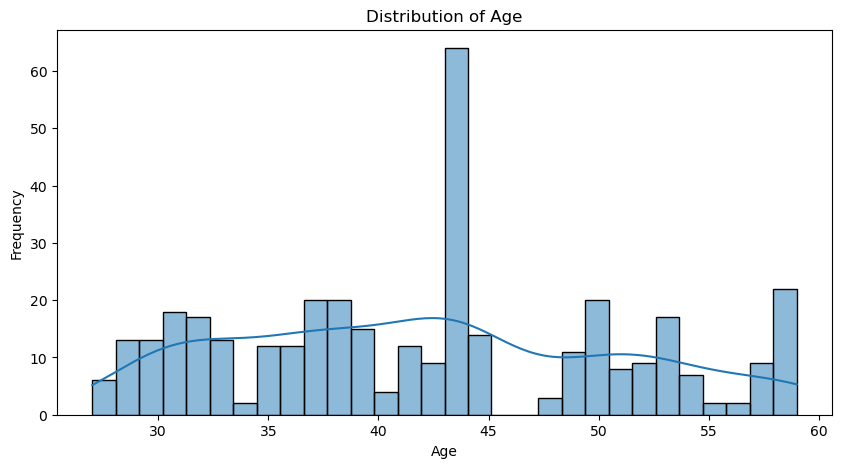

d:\develop\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


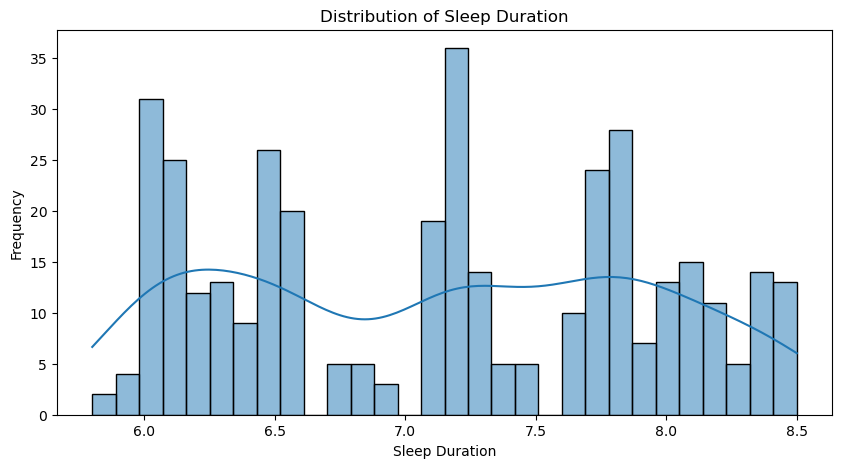

d:\develop\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


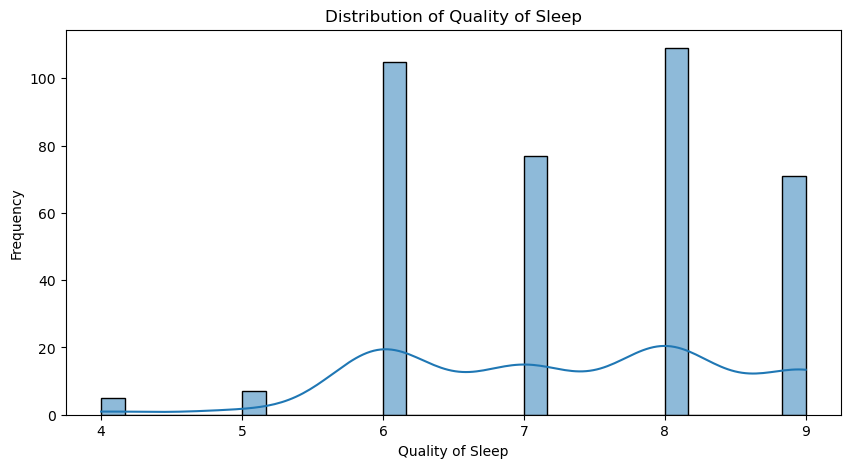

d:\develop\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


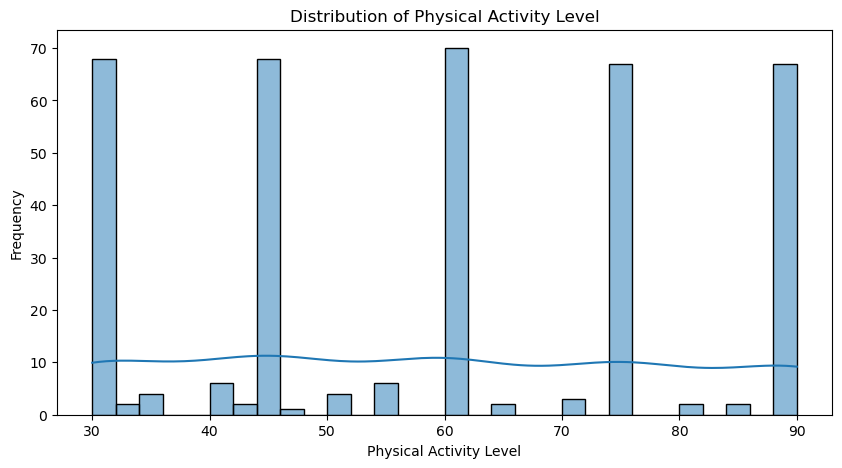

d:\develop\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


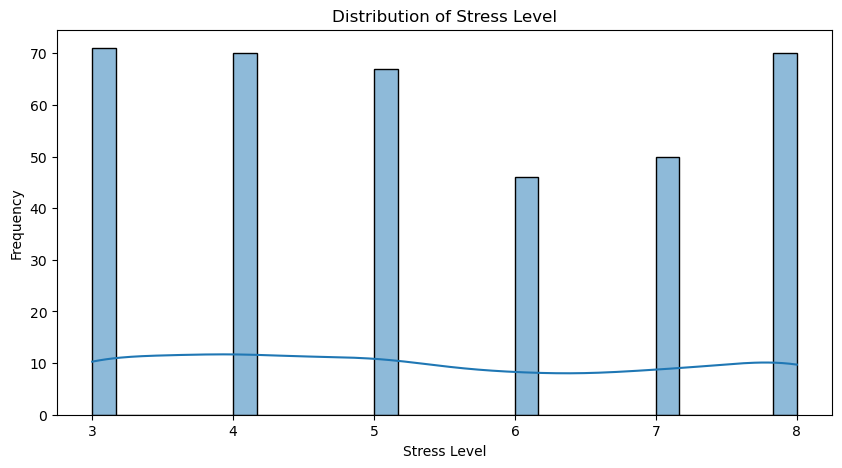

d:\develop\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


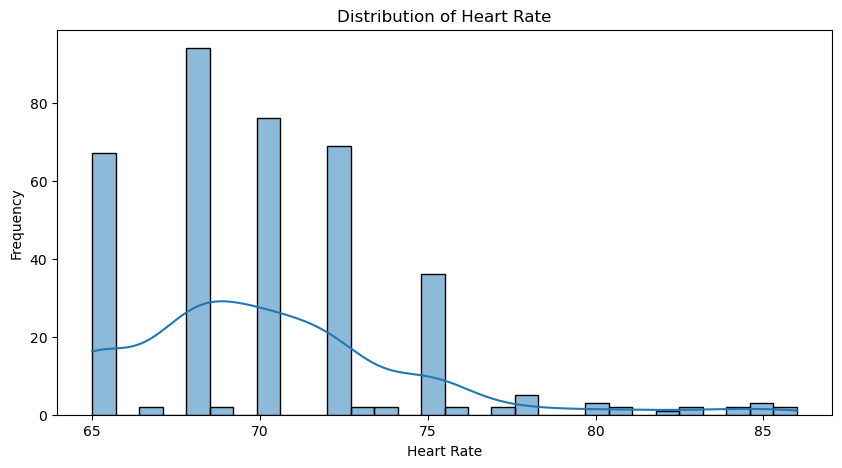

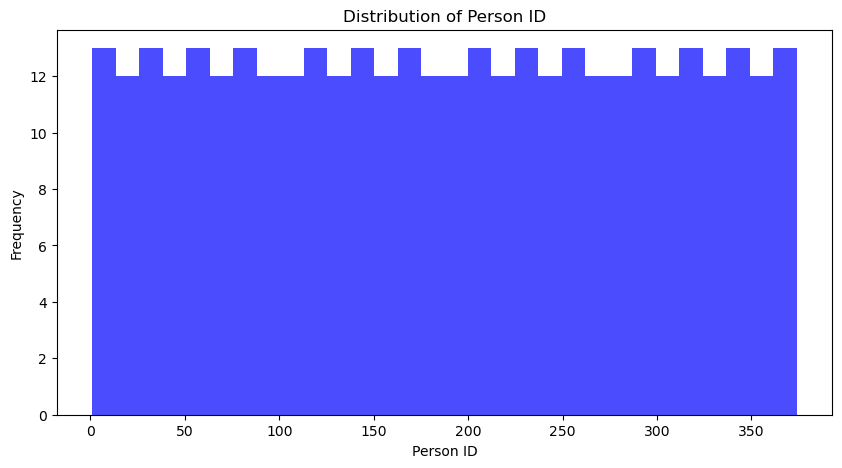

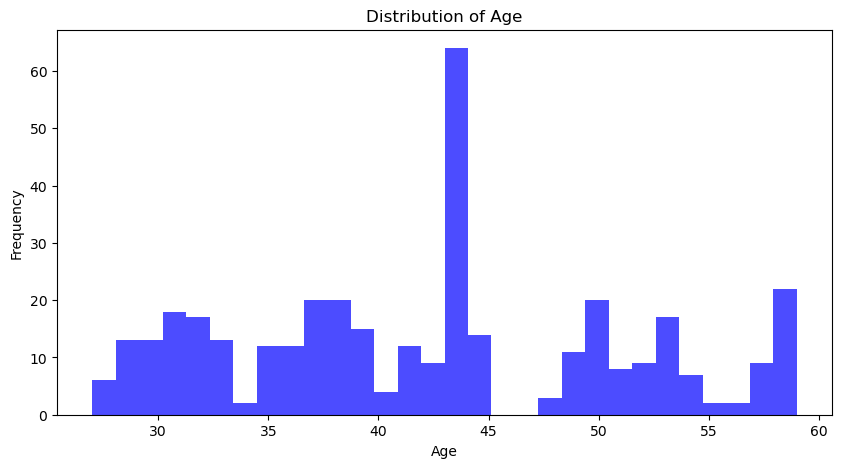

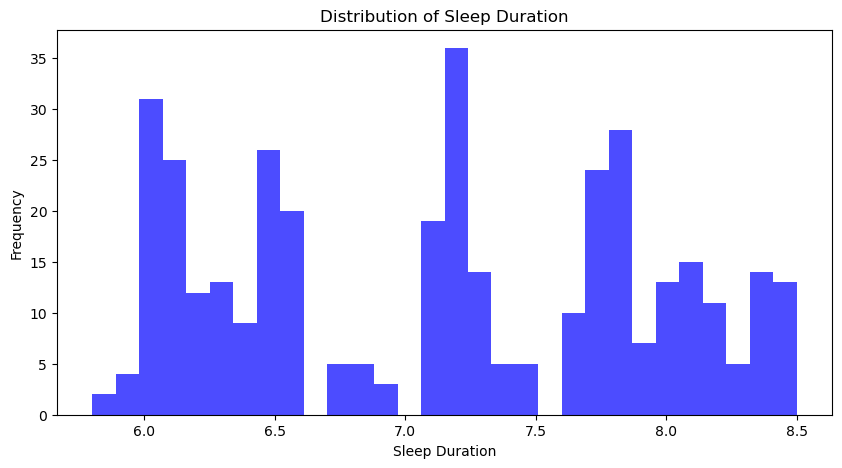

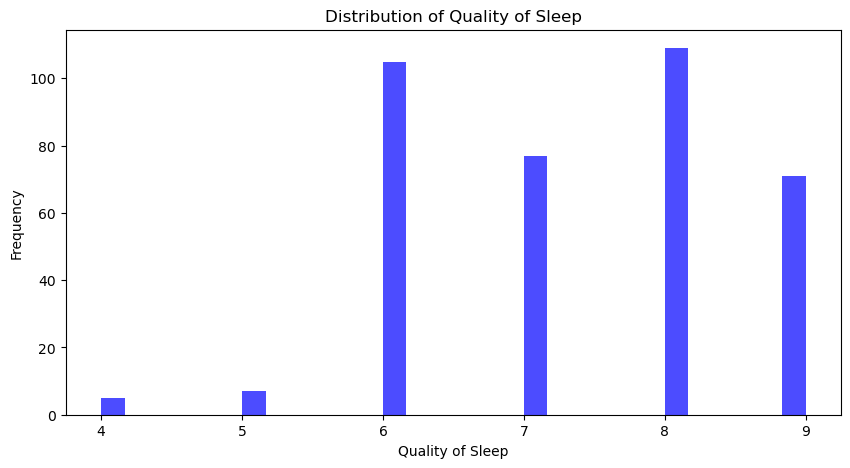

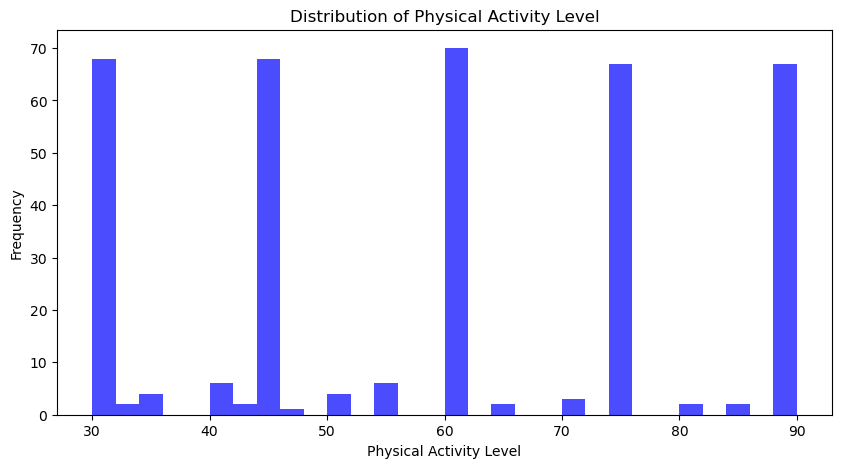

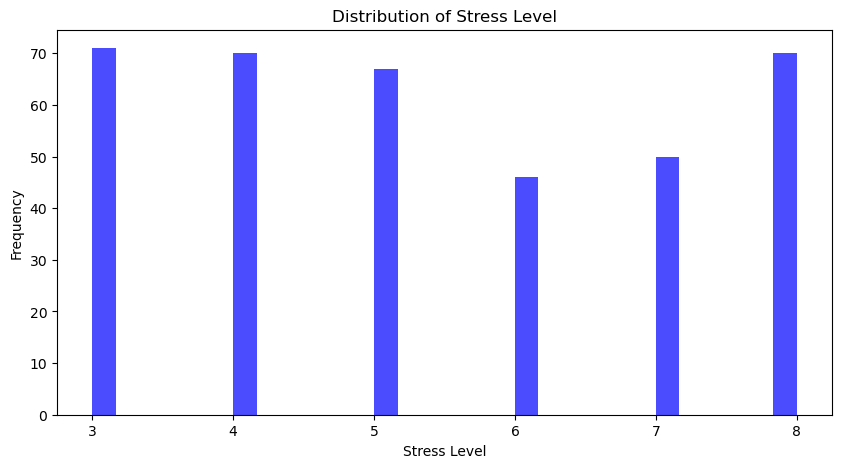

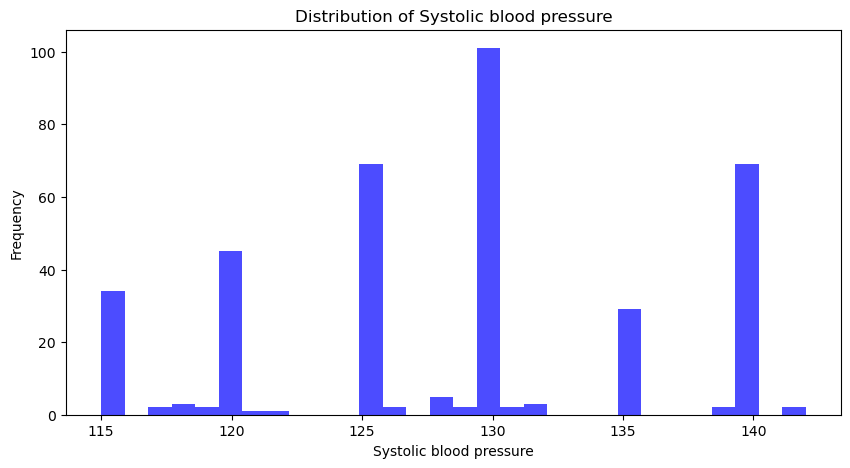

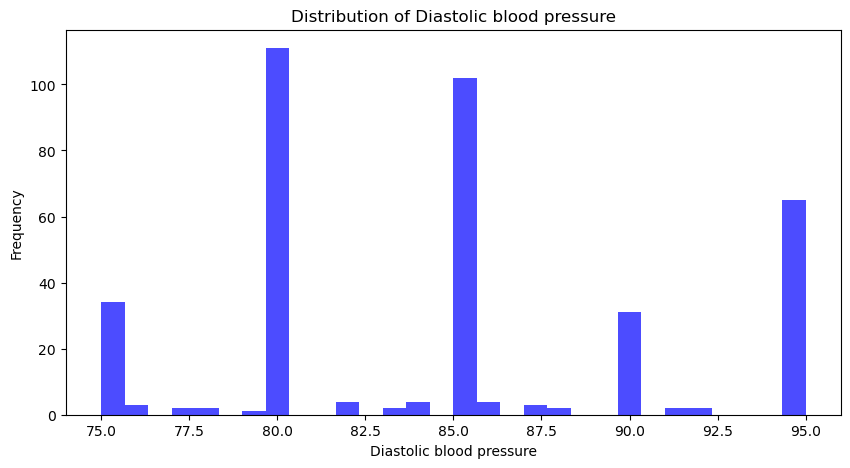

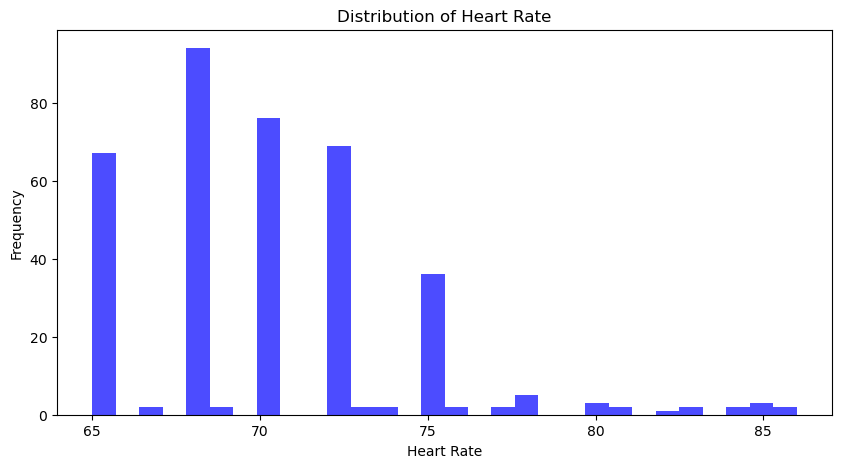

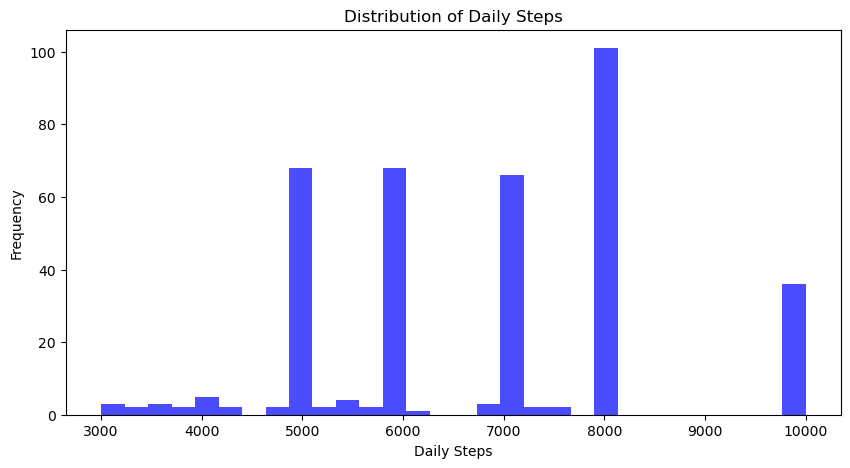

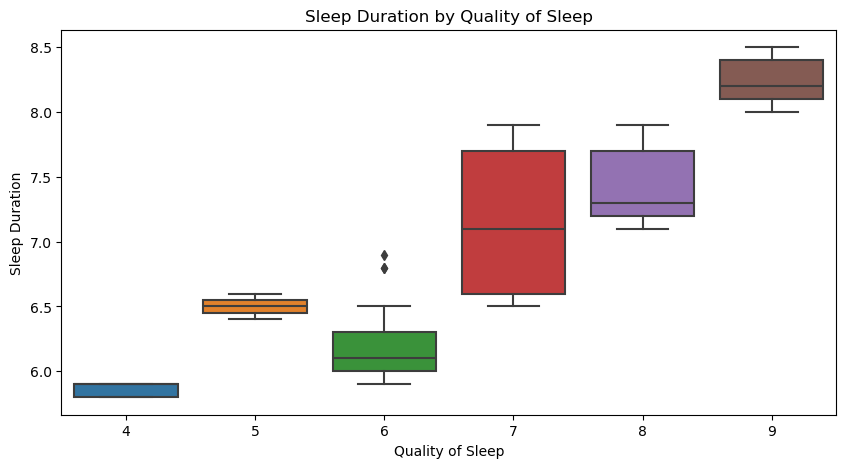

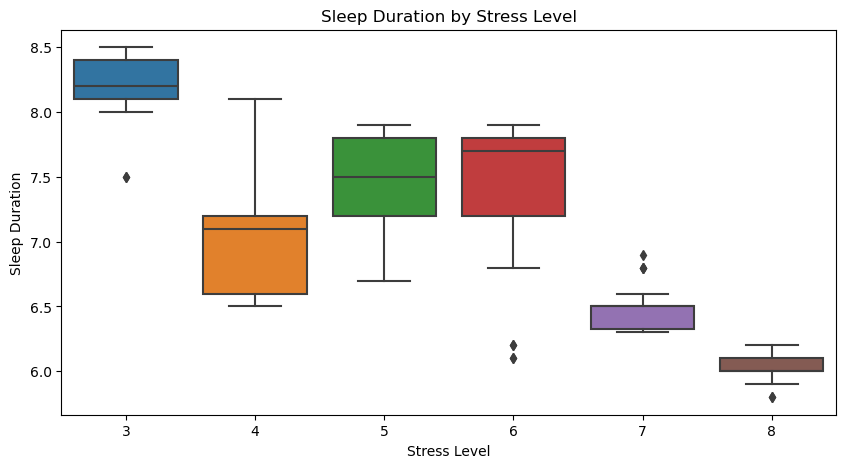

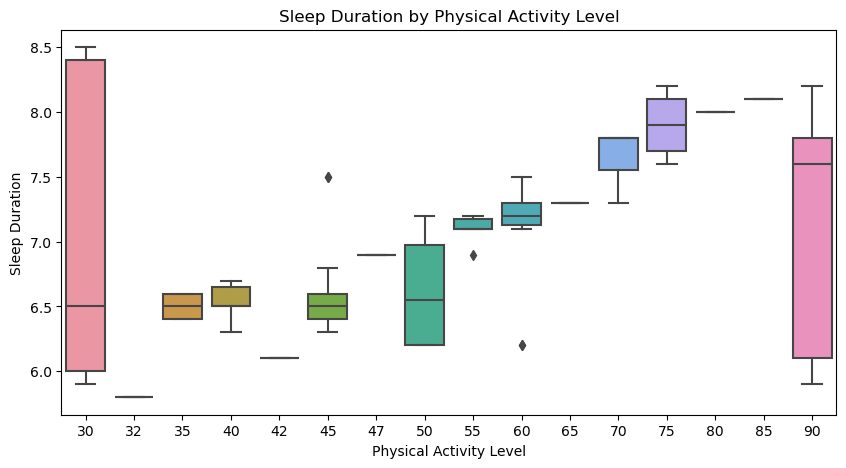

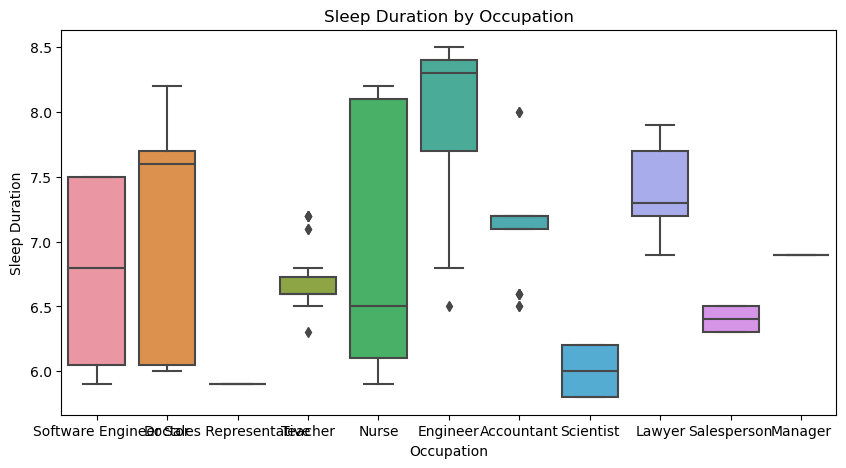

KeyError: 'BMI'

<Figure size 1000x500 with 0 Axes>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Load the dataset using Pandas
df = pd.read_csv('sleep_health.csv')

# Features to visualize
features = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate']
categorical_features = ['Quality of Sleep', 'Stress Level', 'Physical Activity Level', 'Occupation', 'BMI']
relations = [('Age', 'Sleep Duration'), ('Sleep Duration', 'Heart Rate'), ('Heart Rate', 'Daily Steps'), ('Sleep Duration', 'Daily Steps')]

# Step 1: Distribution plots using Pandas
start_time_pd = time.time()
for feature in features:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()
end_time_pd = time.time()

# Load only numeric data for NumPy processing
numeric_data_df = df.select_dtypes(include=[np.number])
data_np = numeric_data_df.to_numpy()  # Convert the numeric DataFrame to NumPy array

# Step 2: Distribution plots using NumPy
start_time_np = time.time()
for i, feature in enumerate(numeric_data_df.columns):
    plt.figure(figsize=(10, 5))
    plt.hist(data_np[:, i], bins=30, alpha=0.7, color='blue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()
end_time_np = time.time()

# Step 3: Sleep Duration by other factors using Pandas
start_time_pd_cat = time.time()
for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[feature], y=df['Sleep Duration'])
    plt.title(f'Sleep Duration by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Sleep Duration')
    plt.show()
end_time_pd_cat = time.time()

# Step 5: Relations between variables using Pandas
start_time_pd_rel = time.time()
for x, y in relations:
    plt.figure(figsize=(10, 5))
    sns.scatterplot(data=df, x=x, y=y)
    plt.title(f'{x} vs {y}')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()
end_time_pd_rel = time.time()

# Step 6: Relations between variables using NumPy
start_time_np_rel = time.time()
for i, (x, y) in enumerate(relations):
    x_index = numeric_data_df.columns.get_loc(x)  # Get the index of x in the NumPy array
    y_index = numeric_data_df.columns.get_loc(y)  # Get the index of y in the NumPy array
    plt.figure(figsize=(10, 5))
    plt.scatter(data_np[:, x_index], data_np[:, y_index], alpha=0.5)
    plt.title(f'{x} vs {y}')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()
end_time_np_rel = time.time()

# Timing Results
total_time_pd = (end_time_pd - start_time_pd) + (end_time_pd_cat - start_time_pd_cat) + (end_time_pd_rel - start_time_pd_rel)
total_time_np = (end_time_np - start_time_np) + (end_time_np_rel - start_time_np_rel)

print("Pandas Total Time for Distribution and Relations: ", total_time_pd)
print("NumPy Total Time for Distribution and Relations: ", total_time_np)

# Faster method
faster_method = "NumPy" if total_time_np < total_time_pd else "Pandas"
print(f"{faster_method} is faster.")


AIM #4: Other possible plotting

1. Think of other possible plots to show some interesting distribution and relations. Do this using both pandas and NumPy

